In [33]:
# Create your first MLP in Keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
from pandas import read_csv
import pandas as pd
import numpy as np


In [34]:
# import some data to play with
df = pd.read_csv('/content/gas_turbines.csv')

In [35]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [36]:
cols = df.columns.tolist()

In [37]:
cols

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

In [38]:
In [12]: cols = cols[-4:] + cols[:-4]

In [13]: cols

['TEY', 'CDP', 'CO', 'NOX', 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT']

In [39]:
df = df[cols] 

In [40]:
df

,TEY,CDP,CO,NOX,AT,AP,AH,AFDP,GTEP,TIT,TAT
0,114.70,10.605,3.1547,82.722,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00
1,114.72,10.598,3.2363,82.776,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00
2,114.71,10.601,3.2012,82.468,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87
3,114.72,10.606,3.1923,82.670,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99
4,114.72,10.612,3.2484,82.311,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98
...,...,...,...,...,...,...,...,...,...,...,...
15034,111.61,10.400,4.5186,79.559,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21
15035,111.78,10.433,4.8470,79.917,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22
15036,110.19,10.483,7.9632,90.912,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32
15037,110.74,10.533,6.2494,93.227,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24


In [46]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
X = df.iloc[:,1:10]
Y = df.iloc[:,0]
x = numpy.array(X)
y = numpy.array(Y)


In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [57]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=9, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(x, y,batch_size = 20, epochs = 50, verbose=1)


Epoch 1/50
752/752 [==============================] - 1s 1ms/step - loss: 17924.3227
Epoch 2/50
752/752 [==============================] - 1s 1ms/step - loss: 16797.4008
Epoch 3/50
752/752 [==============================] - 1s 1ms/step - loss: 15646.3679
Epoch 4/50
752/752 [==============================] - 1s 1ms/step - loss: 14643.7573
Epoch 5/50
752/752 [==============================] - 1s 1ms/step - loss: 13596.1665
Epoch 6/50
752/752 [==============================] - 1s 1ms/step - loss: 12574.6680
Epoch 7/50
752/752 [==============================] - 1s 1ms/step - loss: 11654.5807
Epoch 8/50
752/752 [==============================] - 1s 1ms/step - loss: 10766.0924
Epoch 9/50
752/752 [==============================] - 1s 1ms/step - loss: 9875.8885
Epoch 10/50
752/752 [==============================] - 1s 1ms/step - loss: 9073.7362
Epoch 11/50
752/752 [==============================] - 1s 1ms/step - loss: 8306.0839
Epoch 12/50
752/752 [==============================] - 1s 1ms/step

Finding best set of parameters using manual grid search

In [60]:
def FunctionFindBestParams(x,y):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(x,y,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y-model.predict(x))/y))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(x,y)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 87.04243508015821
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 86.9649541189529
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 91.50282293730187
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 86.92882920263293
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 87.37315671493258
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 86.99731288176451
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 86.92045380412432
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 86.94939891334491
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 90.01606320292152
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 87.12673144204007
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 86.95787707875165
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 86.9181715993974
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 89.25873011507046
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 5.6475012415829156
15 Parameters: batch_

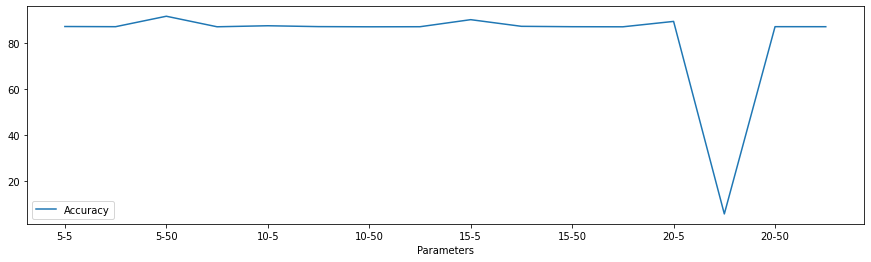

In [61]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

Training the ANN model with the best parameters

In [63]:
model.fit(x, y ,batch_size = 5, epochs = 15, verbose=0)
# Generating Predictions on testing data
Predictions=model.predict(x)


In [64]:
APE=100*((np.abs(y-model.predict(x))/y))
print('The Accuracy of ANN model is:', 100-np.mean(APE))


The Accuracy of ANN model is: 91.4929827677654


In [66]:
Predictions

array([[134.07426],
       [134.07426],
       [134.07426],
       ...,
       [134.07426],
       [134.07426],
       [134.07426]], dtype=float32)